# MODEL

In [2]:
# importando las librerias
import numpy as np
import pandas as pd
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# plots
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm, skew #for some statistics
%matplotlib inline 
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

# MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# ANN
from sklearn.neural_network import MLPRegressor



In [3]:
from dtreeviz.trees import *

In [4]:
# !sudo pip install dtreeviz

In [5]:
XC = pd.read_csv('./pre/XC.csv')
XD = pd.read_csv('./pre/XD.csv')

In [6]:
# XC.head(10)
XD.shape
# XC.shape

(899, 18)

## DEPARTAMENTO

In [11]:
# Calculating the correlation between each feature and SalePrice
corr = XC.corr()
print(corr['price'].sort_values(ascending=False)[:])

price                   1.000000
dimension_ground        0.628262
dimension_built         0.541057
bathroom                0.386900
garage                  0.349054
bedroom                 0.249652
status                  0.218177
riesgo__bajo            0.124615
riesgo__moderado        0.072891
amoblado                0.060028
baulera                 0.045925
neighborhood_encoded    0.034170
riesgo__muy bajo        0.032901
latitud                -0.112347
longitud               -0.156784
riesgo__alto           -0.187933
year_built             -0.286461
Name: price, dtype: float64


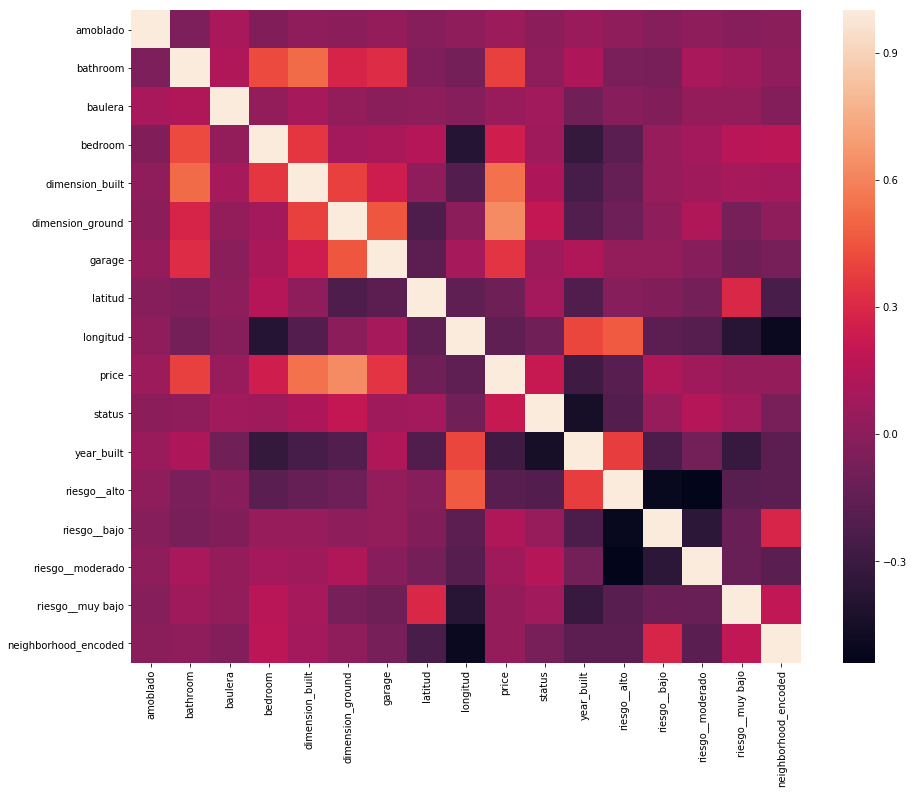

In [12]:
# Plotting the correlation heat map
f, ax = plt.subplots(figsize=(15, 12))
sb.heatmap(corr)
plt.show()

# casa

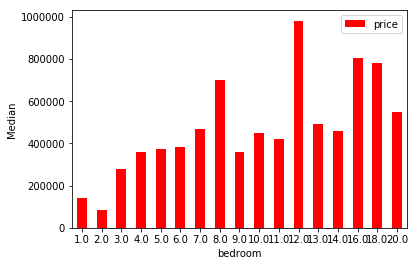

In [13]:
# Analyzing the Overall Quality feature with respect to SalePrice
XC.dimension_built.unique()
pivot = XC.pivot_table(index='bedroom', values='price', aggfunc=np.median)

pivot.plot(kind='bar', color='red')
plt.xlabel('bedroom')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

# depar

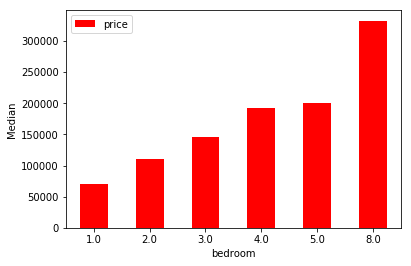

In [14]:
# Analyzing the Overall Quality feature with respect to SalePrice
XD.dimension_built.unique()
pivot = XD.pivot_table(index='bedroom', values='price', aggfunc=np.median)

pivot.plot(kind='bar', color='red')
plt.xlabel('bedroom')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

# caasa

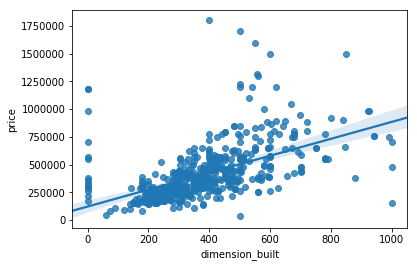

In [15]:
# Analyzing the dimension_built feature with respect to SalePrice
sb.regplot(x='dimension_built', y='price', data=XC)

# departa

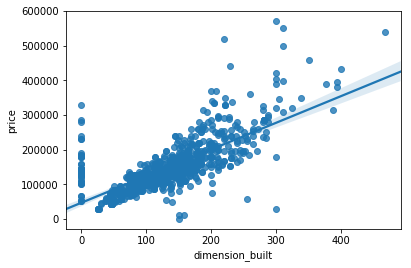

In [16]:
# Analyzing the dimension_built feature with respect to SalePrice
sb.regplot(x='dimension_built', y='price', data=XD)

In [17]:
XD[XD.dimension_built>=1000]['dimension_built'].unique()

array([], dtype=int64)

In [18]:
XD[XD.price>600000]['price'].unique()

array([], dtype=float64)

In [19]:
XC[XC.price>900000]['price'].unique()

array([1320000.,  980000., 1000000., 1050000., 1100000.,  950000.,
       1600000., 1500000., 1300000., 1230000., 1200000.,  920000.,
       1700000., 1800000., 1183000.])

# casa

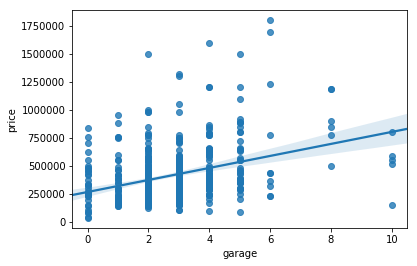

In [20]:
# Analyzing the garage feature with respect to SalePrice
sb.regplot(x='garage', y='price', data=XC)

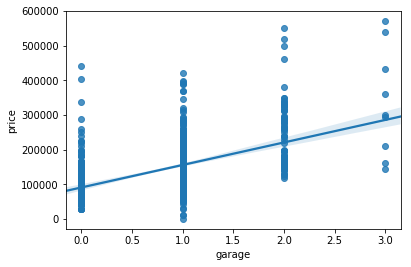

In [21]:
# depar

# Analyzing the garage feature with respect to SalePrice
sb.regplot(x='garage', y='price', data=XD)

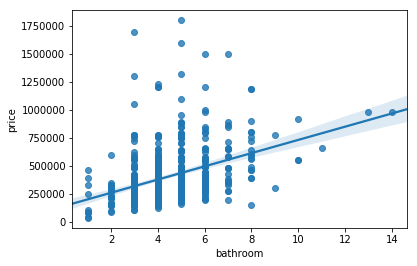

In [22]:
# Analyzing the bathroom feature with respect to SalePrice
sb.regplot(x='bathroom', y='price', data=XC)

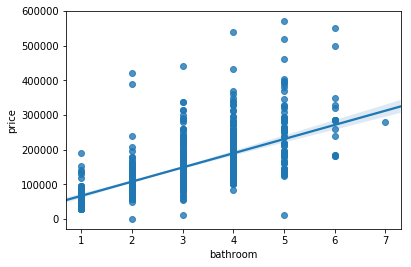

In [23]:
# Analyzing the bathroom feature with respect to SalePrice
sb.regplot(x='bathroom', y='price', data=XD)

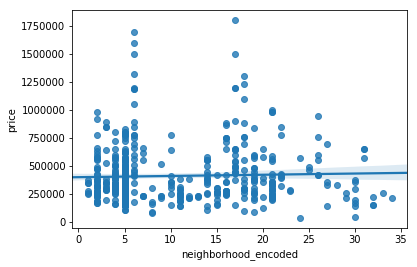

In [24]:
# Analyzing the neighborhood_encoded feature with respect to SalePrice
sb.regplot(x='neighborhood_encoded', y='price', data=XC)

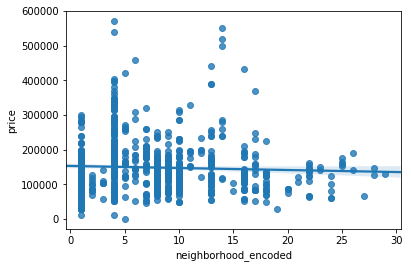

In [25]:
# Analyzing the neighborhood_encoded feature with respect to SalePrice
sb.regplot(x='neighborhood_encoded', y='price', data=XD)

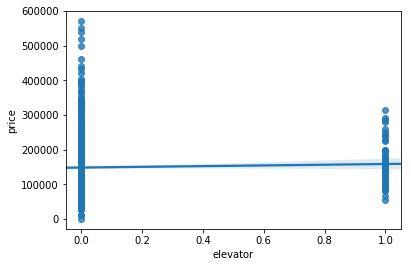

In [26]:
# Analyzing the elevator feature with respect to SalePrice
sb.regplot(x='elevator', y='price', data=XD)

In [27]:
# XC.columns

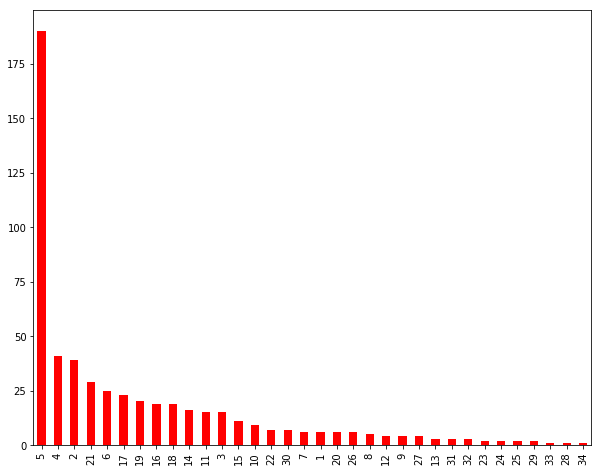

In [28]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['neighborhood_encoded'].value_counts().plot(kind='bar', color='red')

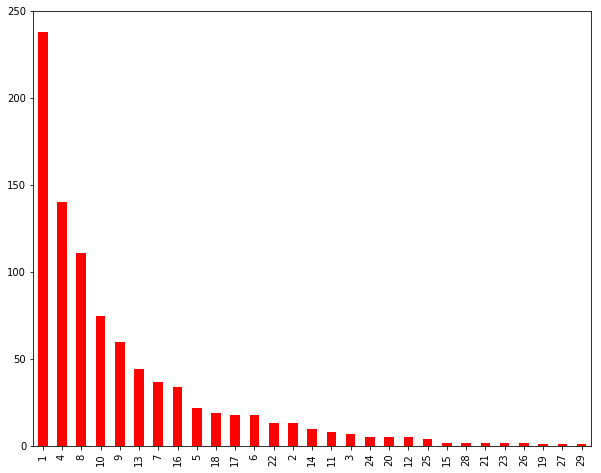

In [29]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XD['neighborhood_encoded'].value_counts().plot(kind='bar', color='red')

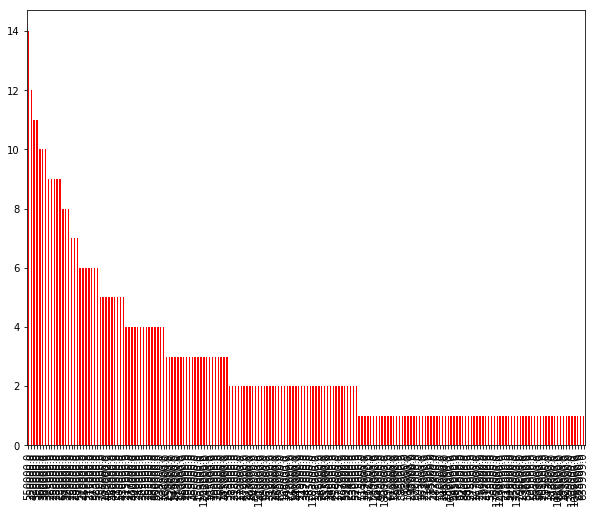

In [30]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['price'].value_counts().plot(kind='bar', color='red')

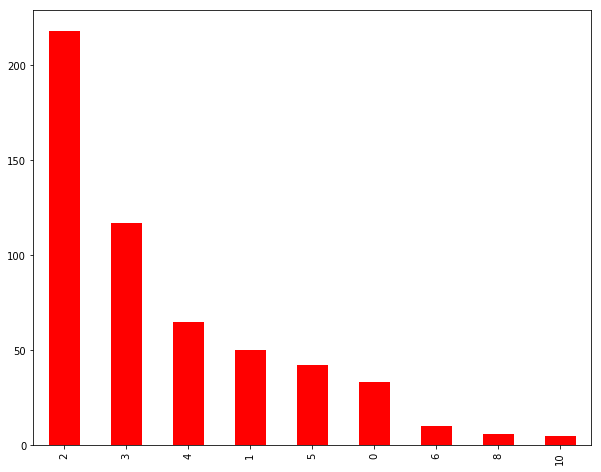

In [31]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['garage'].value_counts().plot(kind='bar', color='red')

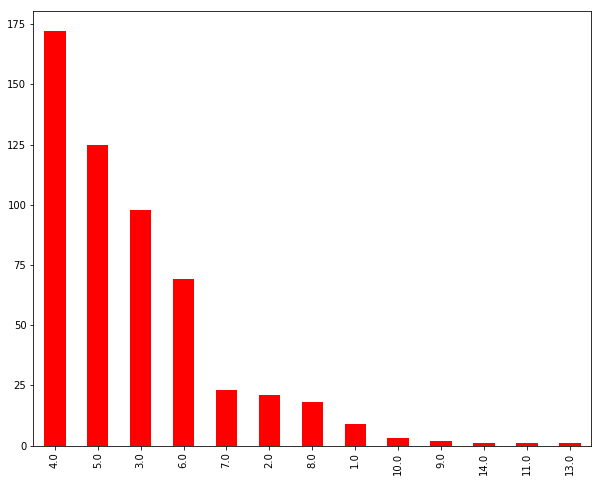

In [32]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['bathroom'].value_counts().plot(kind='bar', color='red')

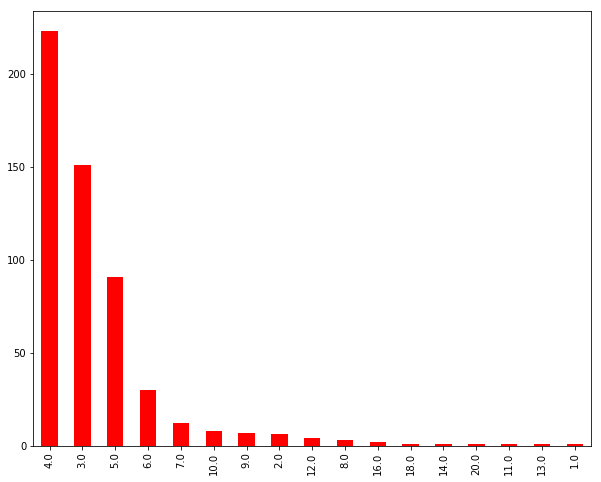

In [33]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['bedroom'].value_counts().plot(kind='bar', color='red')

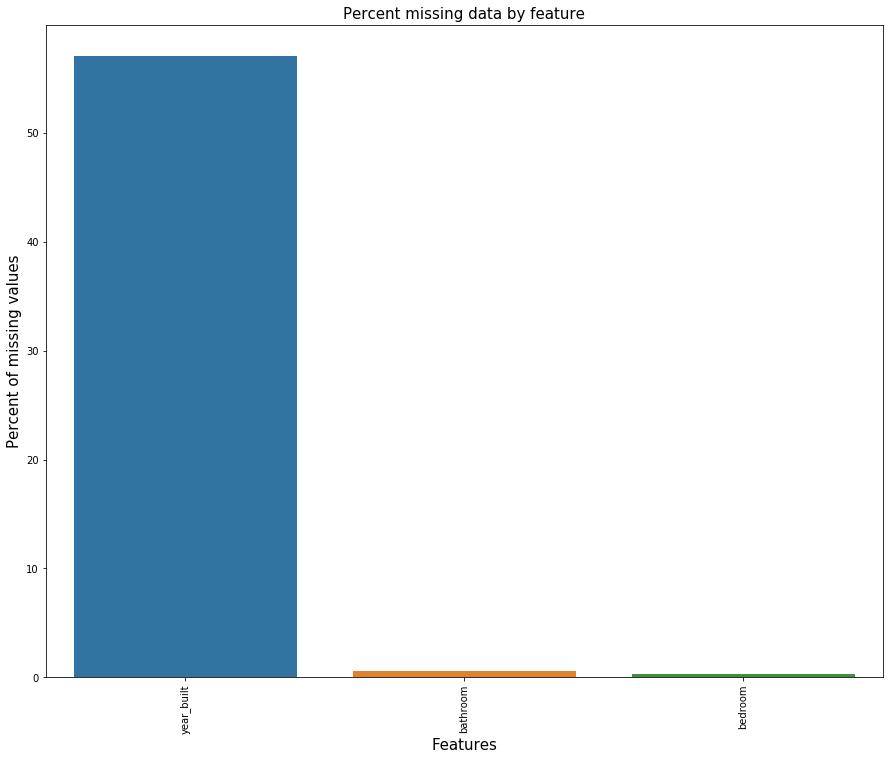

In [38]:
# Plotting the missing ratio of data by feature
f, ax = plt.subplots(figsize=(15, 12))
sb.barplot(x=all_data.index, y=all_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90')
plt.show()

In [39]:
# # Removing the outliers
# data = XC.drop(XC[(XC['dimension_built']>4000) & (data['SalePrice']<300000)].index)
# sb.regplot(x='Gr_Liv_Area', y='SalePrice', data=XC)

## comparing dimension_built	dimension_ground dimensions

In [40]:
#  dimension_built	dimension_ground dimensions
XC[XC['dimension_built']!=XC['dimension_ground']].shape

(528, 17)

In [41]:
## Parsing zero to NaN - dimension_ground

In [42]:
XC['dimension_ground'].replace (0, np.nan, inplace = True)

In [43]:
XD['dimension_ground'].replace (0, np.nan, inplace = True)

In [44]:
## Parsing zero to NaN - dimension_built

In [45]:
XC['dimension_built'].replace (0, np.nan, inplace = True)

In [46]:
XD['dimension_built'].replace (0, np.nan, inplace = True)

In [47]:
XC[XC['dimension_built']>XC['dimension_ground']].shape

(215, 17)

### **IMPUTACION**

In [48]:
# XC.notnull().apply(pd.Series.value_counts)
# XD.notnull().apply(pd.Series.value_counts)

In [49]:
# imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [50]:
valuesC = imputer.fit_transform(XC)
valuesD = imputer.fit_transform(XD)

In [51]:
# datos sin Nans
# valuesC
valuesD

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 2., 0., ..., 0., 0., 2.],
       [0., 3., 0., ..., 0., 0., 3.],
       ...,
       [0., 3., 0., ..., 1., 0., 9.],
       [0., 5., 1., ..., 1., 0., 9.],
       [0., 4., 1., ..., 1., 0., 8.]])

In [52]:
# datos con NaNs...
XC.values
# XD.values

array([[ 0.,  4.,  0., ...,  0.,  0.,  1.],
       [ 0.,  3.,  0., ...,  1.,  0.,  2.],
       [ 0.,  4.,  0., ...,  1.,  0.,  3.],
       ...,
       [ 0.,  8.,  0., ...,  0.,  0.,  6.],
       [ 0.,  4.,  0., ...,  0.,  0., 18.],
       [ 0.,  6.,  0., ...,  1.,  0.,  4.]])

In [53]:
# llevando este array a un Dataframe
Xc = pd.DataFrame(valuesC)
Xd = pd.DataFrame(valuesD)

In [54]:
# xx = XC[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud', 'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
# yy = XC['price']

# X0 = sm.add_constant(xx)
# est = sm.OLS(yy, X0).fit()

# est.summary()


In [55]:
# DEPARTAMENTO
# X = X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'elevator', 'garage', '']]

In [56]:
# NOS DA CANTIDAD DE NULOS QUE EXISTE, O LO TIENEN EN CERO (0)
(XC !=0).apply(pd.Series.value_counts)

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
False,540,NaN,533,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,310,409,395,524,NaN
True,6,546.0,13,546.0,546.0,546.0,513,546.0,546.0,546.0,546.0,546.0,236,137,151,22,546.0


In [57]:
ava = ((XC !=0) & XC.notnull())
# ava
ava.all(axis=1).value_counts()

False    546
dtype: int64

In [58]:
df1 = XC[XC.isna().any(axis=1)]
df1.shape

(299, 17)

In [59]:

# null_columns=XC.columns[XC.isnull().any()]
# XC[null_columns].isnull().sum()

# print(XC[XC["dimension_ground"].isnull()][null_columns])

### **ADDED LABELS TO DATASET**

In [60]:
Xc.columns = XC.columns
Xd.columns = XD.columns

In [61]:
# Xc.columns
Xd.columns

Index(['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built',
       'dimension_ground', 'elevator', 'garage', 'latitud', 'longitud',
       'price', 'status', 'year_built', 'riesgo__alto', 'riesgo__bajo',
       'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded'],
      dtype='object')

In [62]:
### Xc
Xd.head()

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,elevator,garage,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
0,0.0,1.0,0.0,3.0,85.0,139.0,0.0,1.0,-16.527618,-68.053825,89000.0,1.0,2017.0,1.0,0.0,0.0,0.0,1.0
1,0.0,2.0,0.0,2.0,83.0,139.0,0.0,1.0,-16.514166,-68.084206,83000.0,2.0,2002.0,0.0,1.0,0.0,0.0,2.0
2,0.0,3.0,0.0,4.0,128.0,139.0,1.0,1.0,-16.539625,-68.047394,105000.0,1.0,2016.0,0.0,1.0,0.0,0.0,3.0
3,0.0,3.0,0.0,2.0,149.0,139.0,0.0,2.0,-16.541565,-68.084267,228000.0,2.0,2018.0,0.0,1.0,0.0,0.0,4.0
4,0.0,2.0,0.0,1.0,60.0,139.0,0.0,1.0,-16.514936,-68.061073,94500.0,1.0,2019.0,1.0,0.0,0.0,0.0,1.0


In [68]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

# X = XC.loc[:,('amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded')]

# y = XC['price']

# X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']] = scale.fit_transform(X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']].as_matrix())

# est = sm.OLS(y, X).fit()

# est.summary()

In [69]:
XC_sub = XC[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
              'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
XC_sub.corr() 

# -------------
XD_sub = XD[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'elevator','garage', 'latitud', 'longitud',
              'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
XD_sub.corr() 

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,elevator,garage,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
amoblado,1.000000,-0.041498,0.130553,-0.012927,0.010278,NaN,0.176573,0.008354,-0.001657,0.011396,0.031676,-0.014638,0.023096,0.019757,-0.034510,-0.012400,-0.037840
bathroom,-0.041498,1.000000,0.159090,0.658039,0.731738,0.117197,-0.000542,0.474382,-0.002370,0.016318,0.131436,-0.126207,0.030692,0.043213,-0.048303,-0.043364,-0.148330
baulera,0.130553,0.159090,1.000000,0.082333,0.107994,0.128720,0.404933,0.081831,-0.012703,0.055209,0.122350,-0.001085,0.099479,-0.052242,-0.016127,-0.052515,-0.066157
bedroom,-0.012927,0.658039,0.082333,1.000000,0.643606,0.036423,0.074684,0.284999,0.010991,-0.083789,0.185217,-0.261011,-0.017761,-0.010763,0.025448,0.003222,0.010277
dimension_built,0.010278,0.731738,0.107994,0.643606,1.000000,0.723250,0.050671,0.522380,0.002939,-0.036649,0.139338,-0.201538,-0.057707,0.109514,-0.054699,0.002802,-0.018379
dimension_ground,NaN,0.117197,0.128720,0.036423,0.723250,1.000000,-0.039484,0.001709,0.029326,0.057499,0.024813,1.000000,0.138838,-0.051613,-0.087933,-0.025928,-0.103104
elevator,0.176573,-0.000542,0.404933,0.074684,0.050671,-0.039484,1.000000,0.047311,-0.009174,0.023015,-0.022922,0.060685,-0.027970,-0.033051,0.075877,-0.033944,0.009851
garage,0.008354,0.474382,0.081831,0.284999,0.522380,0.001709,0.047311,1.000000,0.003904,0.073246,0.021127,0.064141,0.063822,0.002275,-0.046404,-0.030974,-0.184131
latitud,-0.001657,-0.002370,-0.012703,0.010991,0.002939,0.029326,-0.009174,0.003904,1.000000,-0.036704,0.023093,-0.180720,-0.018216,-0.026107,-0.026042,0.132819,0.052380
longitud,0.011396,0.016318,0.055209,-0.083789,-0.036649,0.057499,0.023015,0.073246,-0.036704,1.000000,-0.032269,0.360752,0.383683,-0.142049,-0.071120,-0.296863,-0.345447


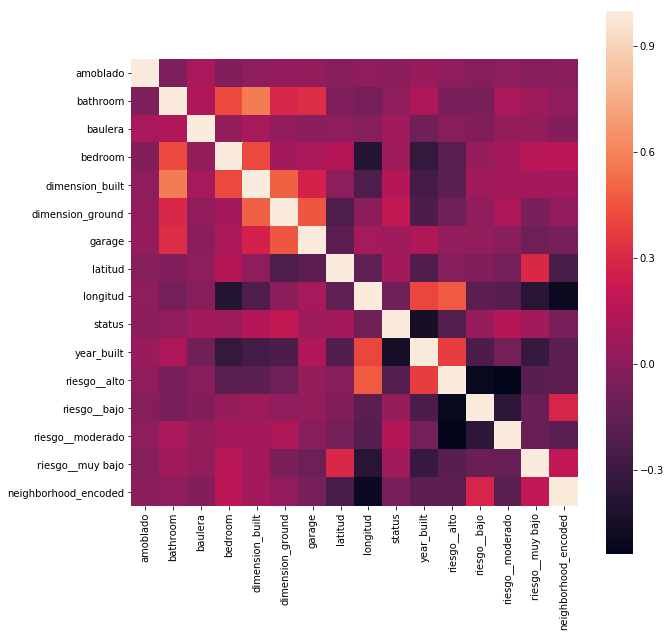

In [70]:
corrmat = XC_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(corrmat, vmax=1, square=True);
plt.show()


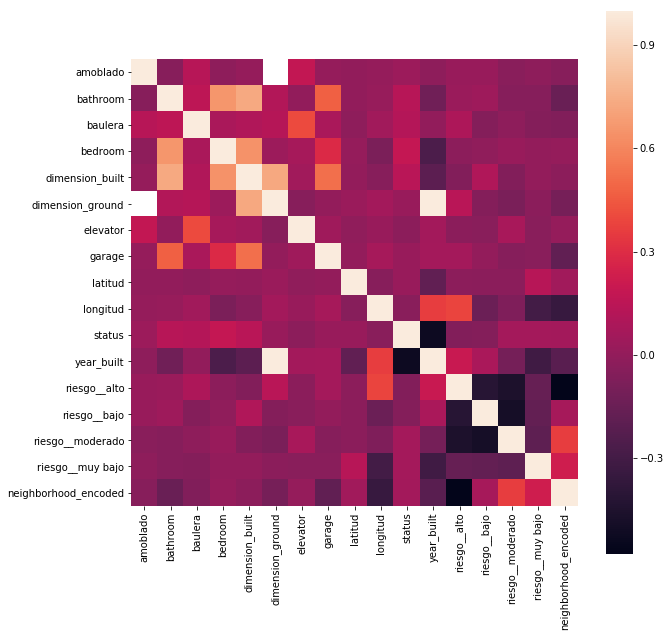

In [71]:
corrmat = XD_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(corrmat, vmax=1, square=True);
plt.show()


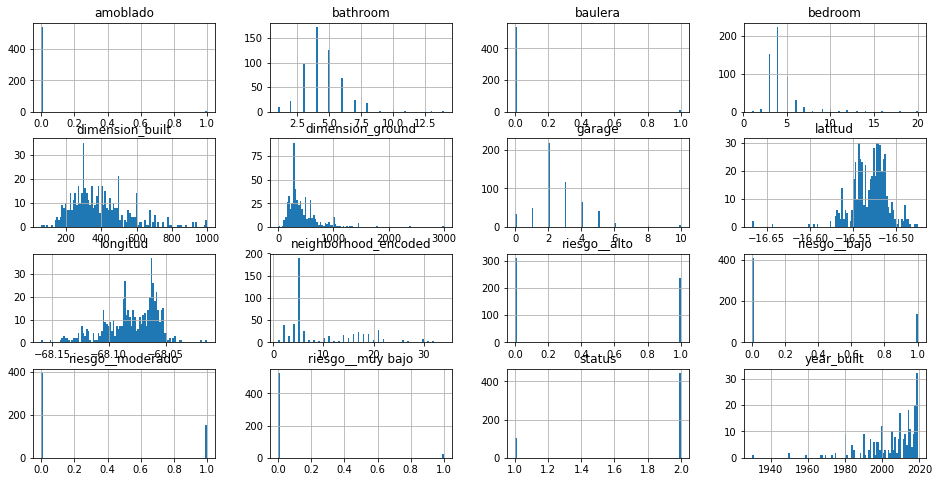

In [72]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
XC_sub.hist(bins=100)
plt.show()

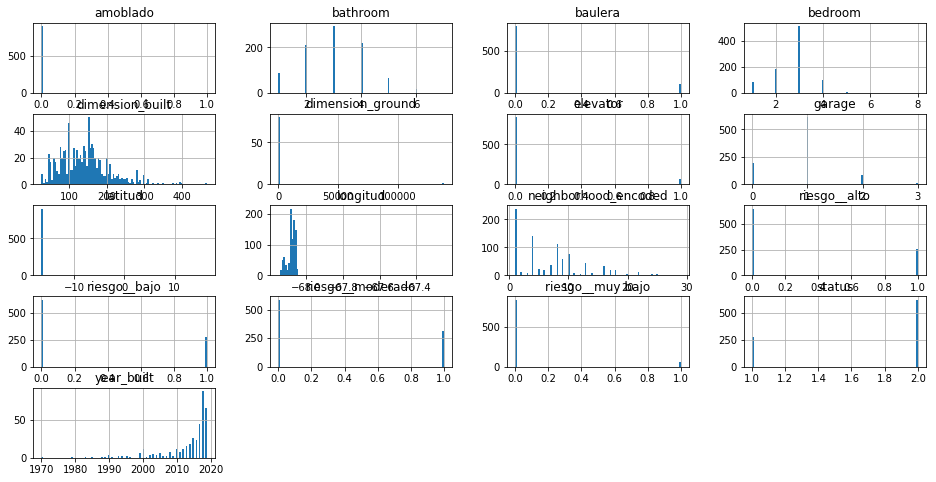

In [73]:
# DEPARTAME
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
XD_sub.hist(bins=100)
plt.show()

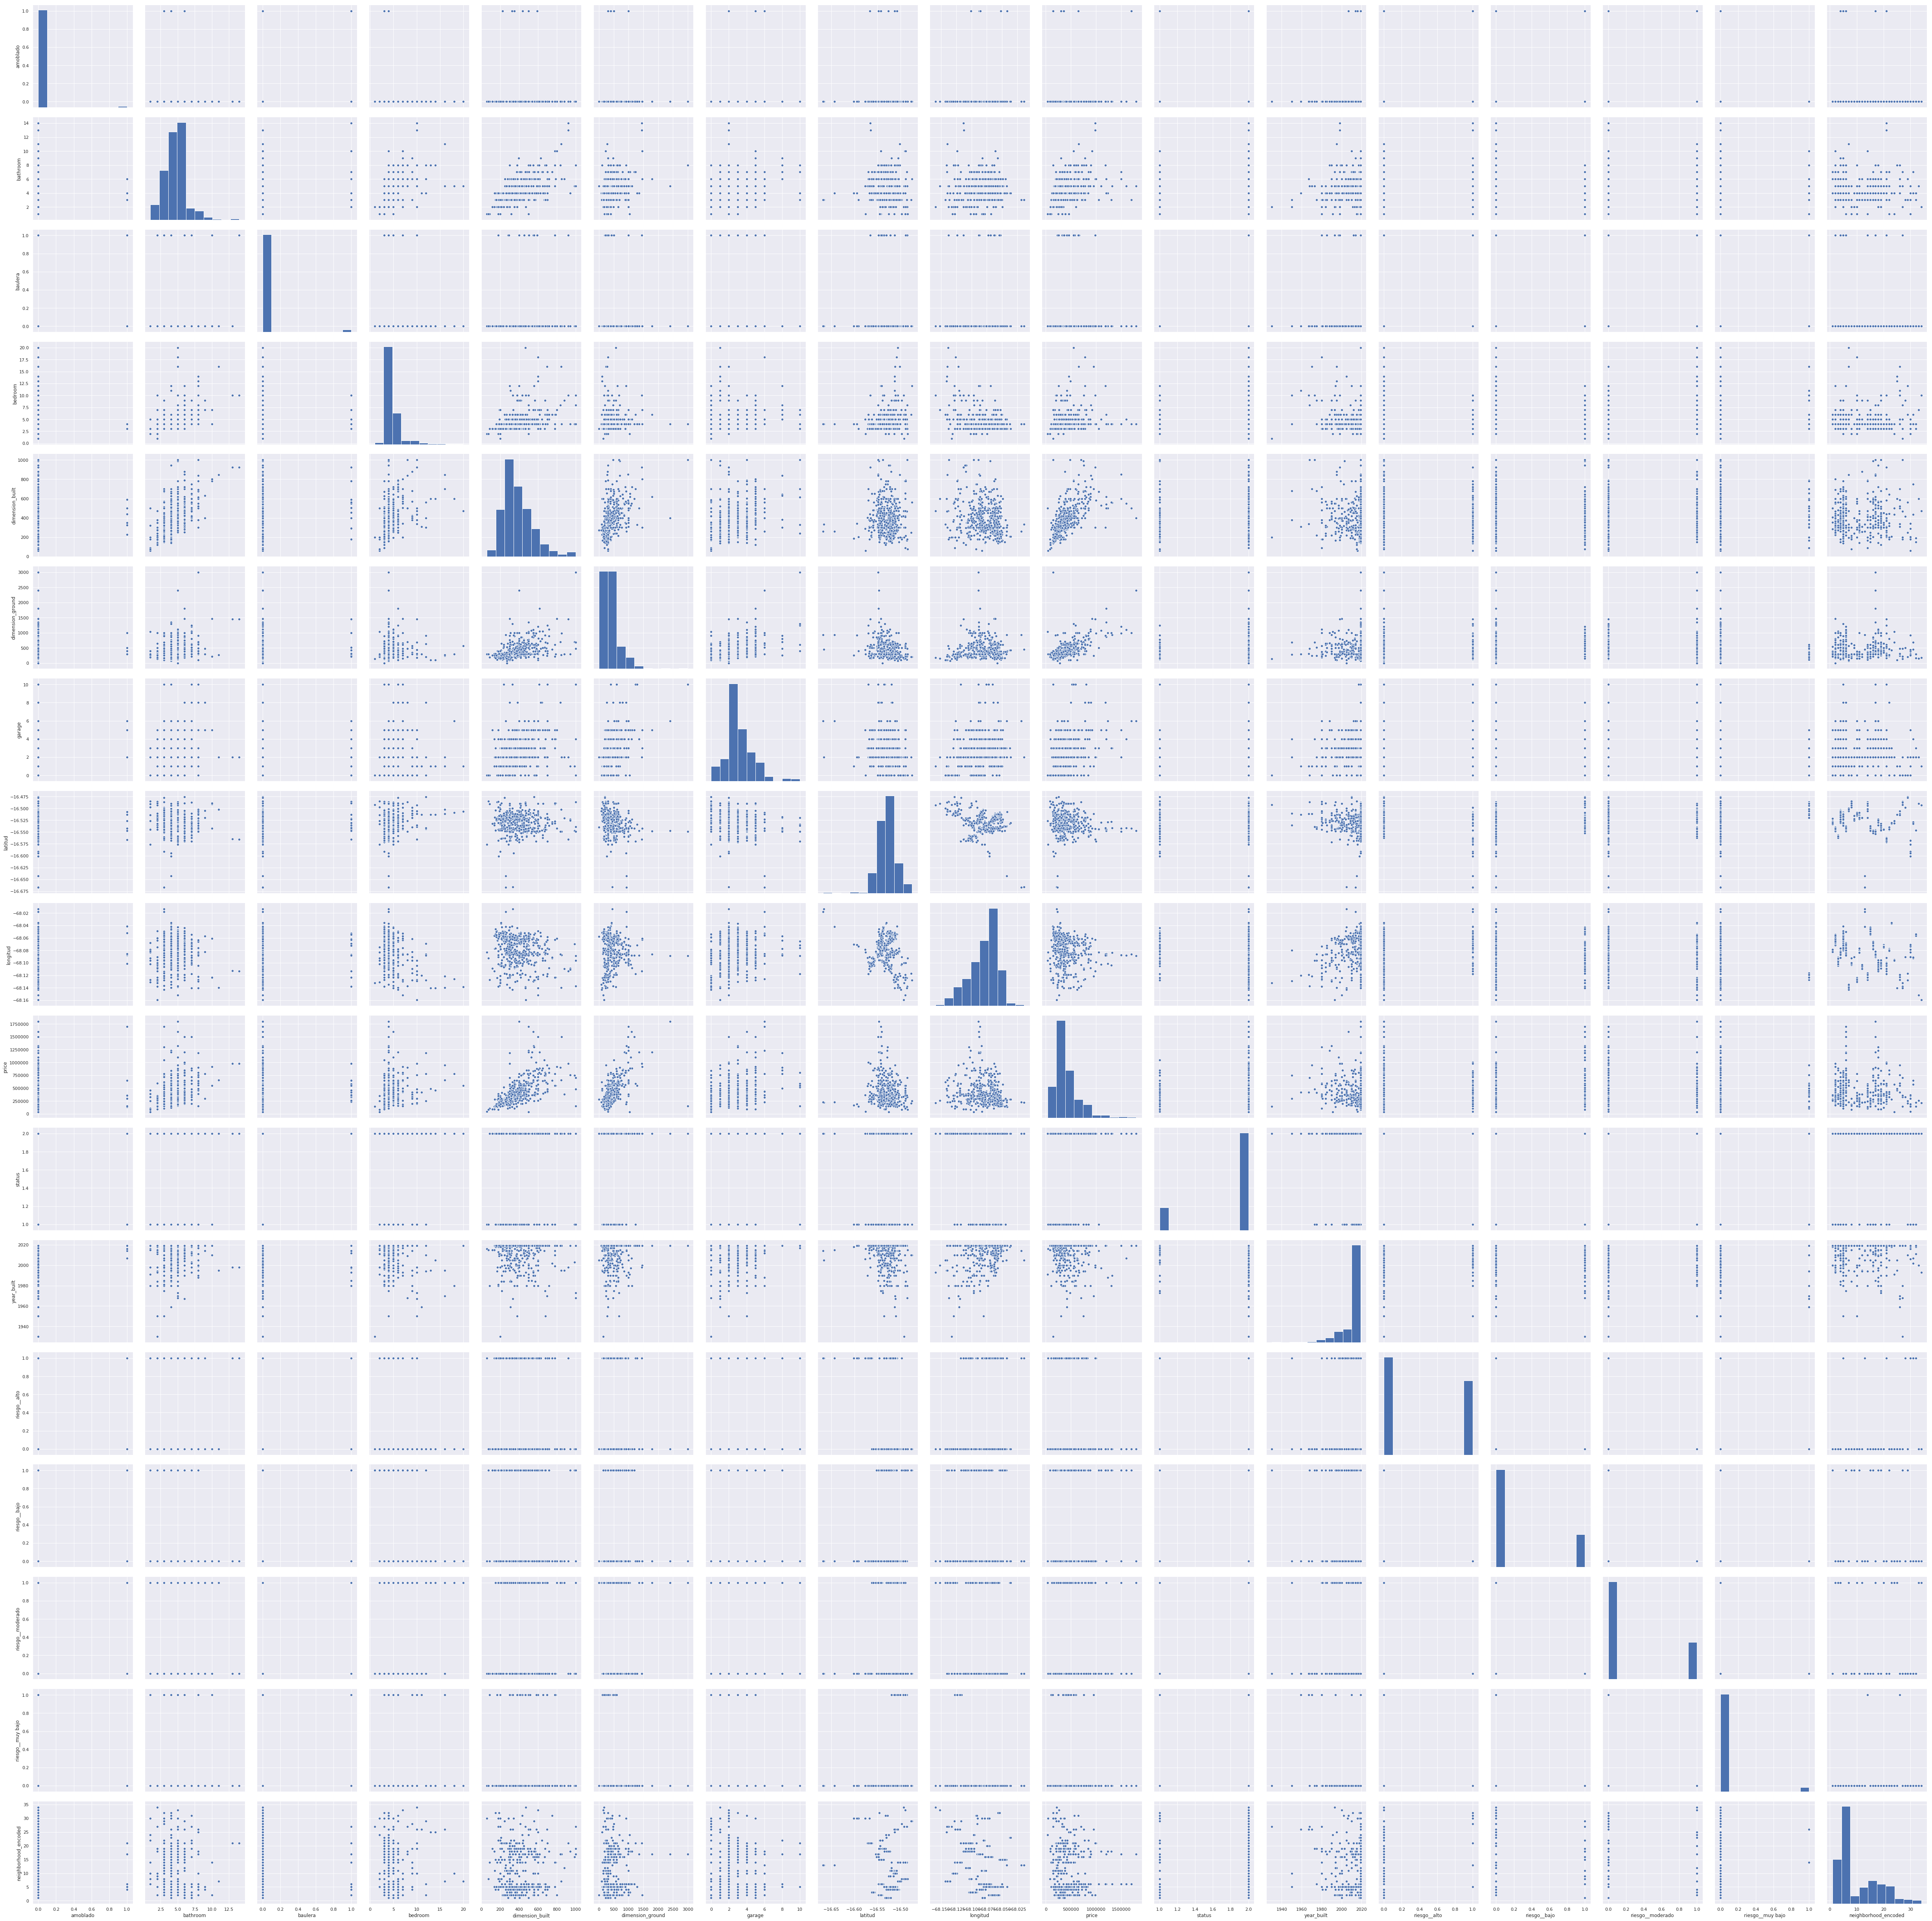

In [74]:
sb.set()
cols = Xc.columns
sb.pairplot(Xc[cols], height = 4)
plt.show();

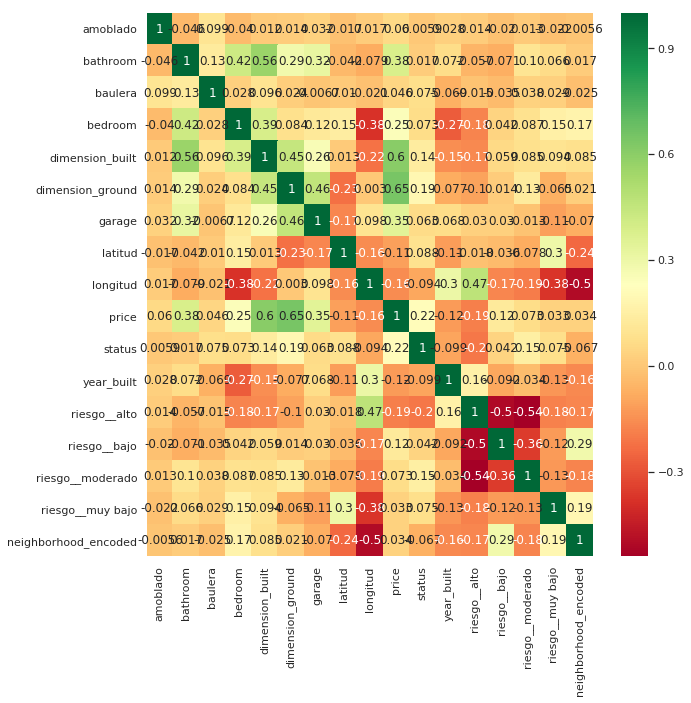

In [75]:
# most correlated features
corrmat = Xc.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0]
plt.figure(figsize=(10,10))
g = sb.heatmap(Xc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

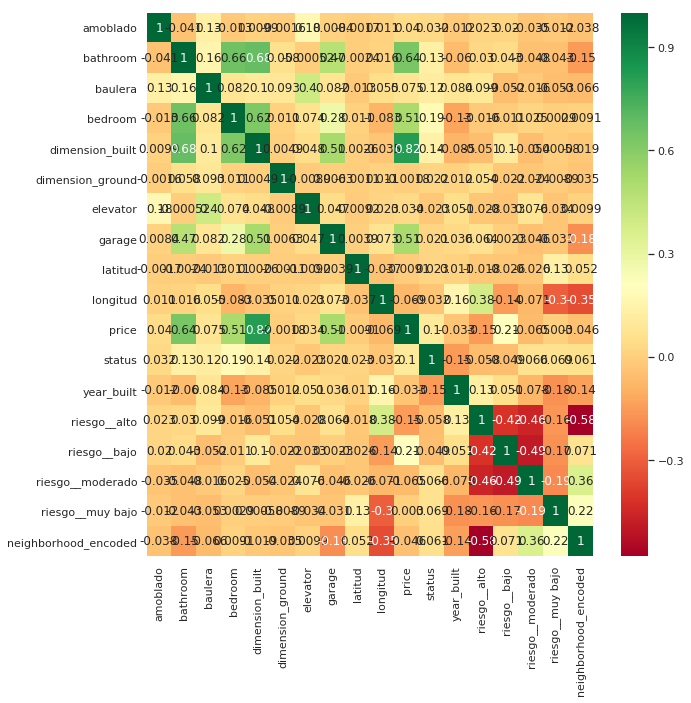

In [76]:
#  DEPAR
# most correlated features
corrmat = Xd.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0]
plt.figure(figsize=(10,10))
g = sb.heatmap(Xd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [77]:
Yc = Xc['price']
Yd = Xd['price']

In [78]:
Xc = Xc.drop('price', axis = 1)
Xd = Xd.drop('price', axis = 1)

In [79]:
# Yc.head()
# Yd.head()

# Yc.shape
# Yd.shape

# splitting data

In [80]:
# 50% en train    |   50% en test
XC_train, XC_test, YC_train, YC_test = train_test_split(Xc, Yc, test_size = 0.5, random_state=1)
XD_train, XD_test, YD_train, YD_test = train_test_split(Xd, Yd, test_size = 0.5, random_state=1)

##  **MODELS**

   - LinearRegression,
   - Ridge,
   - Lasso,
   - ElasticNet,
   - KNeighborsRegressor,
   - DecisionTreeRegressor,
   - SVR,
   - RandomForestRegressor,
   - GradientBoostingRegressor
   - ANN

## linear regression

In [81]:
lr = LinearRegression()

lr.fit(XC_train, YC_train)
lr.score(XC_train, YC_train)

0.5294931392052362

In [82]:
lr.coef_
lr.intercept_ 

-65338482.750478506

#### **PREDICTING**

In [83]:
pp = XC_test.iloc[0]
pp

amoblado                   0.000000
bathroom                   4.000000
baulera                    0.000000
bedroom                    3.000000
dimension_built          139.000000
dimension_ground         301.000000
garage                     1.000000
latitud                  -16.531359
longitud                 -68.056221
status                     2.000000
year_built              2019.000000
riesgo__alto               1.000000
riesgo__bajo               0.000000
riesgo__moderado           0.000000
riesgo__muy bajo           0.000000
neighborhood_encoded       5.000000
Name: 207, dtype: float64

In [84]:
pp = XC_test.sample(1)
# pp = XC_train.sample(1)
pp

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
192,0.0,4.0,0.0,4.0,500.0,600.0,5.0,-16.513569,-68.052162,2.0,2013.0,1.0,0.0,0.0,0.0,5.0


In [85]:
ppd = XD_test.sample(1)
# pp = XC_train.sample(1)
ppd

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,elevator,garage,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
372,0.0,1.0,0.0,1.0,46.0,139.0,0.0,1.0,-16.545795,-68.063148,2.0,2018.0,0.0,0.0,1.0,0.0,10.0


In [86]:
# predict recibe una matriz o serie
prediction = lr.predict(pp)
prediction

array([466427.06562163])

### **RIDGE**

In [87]:
np.random.seed(0)

clf = Ridge(alpha=1.0)
clf.fit(XC_train, YC_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
clf.predict(pp)

array([490118.23487715])

### **LASSO**

In [89]:
lasso = Lasso()
lasso.fit(XC_train, YC_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
lasso.predict(pp)

array([466536.23847532])

### **ELASTIC NET**

In [91]:
regr = ElasticNet(random_state=0)
regr.fit(XC_train, YC_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
regr.predict(pp)

array([501326.18321279])

### KNN

In [93]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(XC_train, YC_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [94]:
neigh.predict(pp)

array([585000.])

### DecisionTreeRegressor

In [95]:
# otro
regressor = DecisionTreeRegressor(random_state=0)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=7)

In [96]:
regressor.fit(XC_train, YC_train)

regr_1.fit(XC_train, YC_train)
regr_2.fit(XC_train, YC_train)



DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [97]:
# Predict
regressor.predict(pp)

# regr_1.predict(pp)
# regr_2.predict(pp)

array([290000.])

### RANDOM FOREST

In [98]:
rf = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)
rf.fit(XC_train, YC_train)
predicted = rf.predict(XC_test)

In [99]:
rf.predict(pp)

array([505937.07695775])

### GRADIENT BOOSTING

In [100]:
alpha = 0.95
gb = GradientBoostingRegressor(loss='quantile', alpha=alpha,n_estimators=250, max_depth=3, learning_rate=.1, min_samples_leaf=9, min_samples_split=9)

gb.fit(XC_train, YC_train)

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [101]:
gb.predict(pp)

array([713887.57742506])

### SVR

In [102]:
svr = SVR(kernel='linear')
svr.fit(XC_train,YC_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
svr.predict(pp)

array([527553.29059619])

# ANN

In [104]:
rate1 = 0.005
rate2 = 0.1

mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# trained = mlpr.fit(x_train, y_train)  # should I fit before cross val?
# predicted = mlpr.predict(x_test)      

# scores = cross_val_score(mlpr, XC_train, YC_train, cv=6)
# print(scores)

In [105]:
# scores.mean()

In [106]:
# HIDDEN LAYERS!!!!!!!!!
# mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# trained = mlpr.fit(XC_train, YC_train)  # should I fit before cross val?
# # predicted = mlpr.predict(XC_test)      

# scores = cross_val_score(mlpr, XC_train, YC_train, cv=5)
# print(scores)

In [107]:
# scores.mean()

In [108]:
# coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
# len(mlpr.coefs_)

# len(mlpr.coefs_[0])

# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.
# len(mlpr.intercepts_[0])

In [109]:
# mlpr.predict(pp)
# mlpr.predict([np.array([0,2,0,4,297,2,-16.515982,-68.088051,0.0,2.0,2014,0.0,1.0,0.0,0.0])])

# DEPARTAMENTO

## linear regression

In [110]:
lrd = LinearRegression()

lrd.fit(XD_train, YD_train)
lrd.score(XD_train, YD_train)

0.7846091104685919

In [111]:
lrd.coef_
lrd.intercept_ 

-100545048.67714365

### **RIDGE**

In [112]:
np.random.seed(0)

clfd = Ridge(alpha=1.0)
clfd.fit(XD_train, YD_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### **LASSO**

In [113]:
lassod = Lasso()
lassod.fit(XD_train, YD_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### **ELASTIC NET**

In [114]:
regrd = ElasticNet(random_state=0)
regrd.fit(XD_train, YD_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

### KNN

In [115]:
neighd = KNeighborsRegressor(n_neighbors=2)
neighd.fit(XD_train, YD_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

### DecisionTreeRegressor

In [116]:
# otro
regressord = DecisionTreeRegressor(random_state=0)
# Fit regression model
regr_1d = DecisionTreeRegressor(max_depth=2)
regr_2d = DecisionTreeRegressor(max_depth=5)

In [117]:
regressord.fit(XD_train, YD_train)

regr_1d.fit(XD_train, YD_train)
regr_2d.fit(XD_train, YD_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### RANDOM FOREST

In [118]:
rfd = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
rfd.fit(XD_train, YD_train)
predictedd = rfd.predict(XD_test)

### GRADIENT BOOSTING

In [119]:
alpha = 0.95
gbd = GradientBoostingRegressor(loss='quantile', alpha=alpha,n_estimators=250, max_depth=3, learning_rate=.1, min_samples_leaf=9, min_samples_split=9)

gbd.fit(XD_train, YD_train)

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### SVR

In [120]:
svrd = SVR(kernel='linear')
svrd.fit(XD_train,YD_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

# ANN

In [121]:
# rate1 = 0.005
# rate2 = 0.1

# mlprd = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# # trained = mlpr.fit(x_train, y_train)  # should I fit before cross val?
# # predicted = mlpr.predict(x_test)      

# scores = cross_val_score(mlprd, XD_train, YD_train, cv=6)
# print(scores)

In [122]:
# scores.mean()

In [123]:
# HIDDEN LAYERS!!!!!!!!!
# mlprd = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# trained = mlprd.fit(XC_train, YC_train)  # should I fit before cross val?

# scores = cross_val_score(mlprd, XC_train, YC_train, cv=5)
# print(scores)

In [124]:
# scores.mean()

In [125]:
# coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
# len(mlpr.coefs_)

# len(mlpr.coefs_[0])

# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.
# len(mlpr.intercepts_[0])

## EXPORTING THE MODEL

In [126]:
import pickle 
pickle.dump(gb, open('./model.pkl', 'wb'))

In [127]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    OKGREENAQUA = '\033[4m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [128]:
def color(modelp, original_price):
    per = abs(int(modelp)-int(original_price))*100/int(original_price)
    if (per <= 20):
        return bcolors.OKGREEN
    if (per > 20 and per <=50):
        return bcolors.WARNING
    if (per > 50 ):
        return bcolors.FAIL
    return bcolors.UNDERLINE

In [129]:
TEMP = pd.read_csv('./casasN.csv')
TEMPD = pd.read_csv('./departamentosN.csv')

In [130]:
# pp = XC_test.sample(1)
# ppd = XD_test.sample(1)

In [131]:
# row = TEMP[TEMP['latitud'] == pp['latitud'].values[0]]
# original_price = row['price'].values[0]
# original_price

In [132]:
pp = XC_test.sample(1)
row = TEMP[TEMP['latitud'] == pp['latitud'].values[0]]
original_price = row['price'].values[0]
# predict recibe una matriz o serie
# LinearRegression
print("{: >44} {: >20} {}".format('PRECIO Real: '+bcolors.BOLD,original_price,bcolors.ENDC))
print("{: >50} {: >20}".format(bcolors.OKBLUE+'LinearRegression: '+color(lr.predict(pp),original_price),lr.predict(pp)[0]))
# Ridge
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Ridge: '+color(clf.predict(pp)[0], original_price),clf.predict(pp)[0]))
# Lasso
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Lasso: '+color(lasso.predict(pp)[0], original_price),lasso.predict(pp)[0]))
# ElasticNet
print("{: >50} {: >20}".format(bcolors.OKBLUE+'ElasticNet: '+color(regr.predict(pp)[0], original_price),regr.predict(pp)[0]))
KNeighborsRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+'KNeighborsRegressor: '+color(neigh.predict(pp)[0], original_price),neigh.predict(pp)[0]))
# DecisionTreeRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor: "+color(regressor.predict(pp)[0], original_price),regressor.predict(pp)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 2): "+color(regr_1.predict(pp)[0], original_price),regr_1.predict(pp)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 5): "+color(regr_2.predict(pp)[0], original_price),regr_2.predict(pp)[0]))
# RandomForestRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"RandomForestRegressor: "+color(rf.predict(pp)[0], original_price),rf.predict(pp)[0]))
# GradientBoostingRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"GradientBoostingRegressor: "+color(gb.predict(pp)[0], original_price),gb.predict(pp)[0]))
# SVR
print("{: >50} {: >20}".format(bcolors.OKBLUE+"SVR: "+color(svr.predict(pp)[0], original_price),svr.predict(pp)[0]))
# # ANN
# print("{: >50} {: >20}".format(bcolors.OKBLUE+"ANN: "+color(mlpr.predict(pp)[0], original_price),mlpr.predict(pp)[0]))

                           PRECIO Real:                220000 
                      LinearRegression:    141383.19875007868
                                 Ridge:    190780.47140508005
                                 Lasso:    141651.69454036653
                            ElasticNet:    221678.60713470425
                   KNeighborsRegressor:              245000.0
                 DecisionTreeRegressor:              149000.0
 DecisionTreeRegressor (max_depth = 2):     275510.3448275862
 DecisionTreeRegressor (max_depth = 5):              174875.0
                 RandomForestRegressor:     221279.6683428185
             GradientBoostingRegressor:     288267.6145846659
                                   SVR:    221433.38261195386


In [133]:
print("CASAS")
print("-----------------")

# LINEAR REGRESSION
print(bcolors.OKGREEN+"LINEAR REGRESSION: ")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, lr.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, lr.score(XC_test, YC_test))
print("----------------------------------")
# # Ridge
print(bcolors.OKGREEN+"RIDGE:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, clf.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, clf.score(XC_test, YC_test))
print("----------------------------------")

# Lasso lasso
print(bcolors.OKGREEN+'LASSO:')
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC,lasso.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, lasso.score(XC_test, YC_test))
print("----------------------------------")

# ELASTIC NET
print(bcolors.OKGREEN+"ELASTIC NET:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regr.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regr.score(XC_test, YC_test))
print("----------------------------------")

# KNN
print(bcolors.OKGREEN+"N-Nearest-Neighbors:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, neigh.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, neigh.score(XC_test, YC_test))
print("----------------------------------")

# DECISION TREE - DEEP = 2  
print(bcolors.OKGREEN+"DecisionTreeRegressor (max_depth = 2)")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regr_1.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regr_1.score(XC_test, YC_test))
print("----------------------------------")

# DECISION TREE - DEEP = 5
print(bcolors.OKGREEN+"DecisionTreeRegressor (max_depth = 5)")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regr_2.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regr_2.score(XC_test, YC_test))
print("----------------------------------")

# RANDOM FOREST
print(bcolors.OKGREEN+"RANDOM FOREST:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, rf.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, rf.score(XC_test, YC_test))
print("----------------------------------")

# GADIENT BOOSTING
print(bcolors.OKGREEN+"Gradient Boosting Regressor: ")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, gb.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, gb.score(XC_test, YC_test))
print("----------------------------------")

# SVM
print(bcolors.OKGREEN+"Support Vector Machine - regressor:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, svr.score(XC_train, YC_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, svr.score(XC_test, YC_test))


CASAS
-----------------
LINEAR REGRESSION: 
TRAIN SCORE 0.5294931392052362
TEST SCORE 0.5122552347970397
----------------------------------
RIDGE:
TRAIN SCORE 0.5210447478521267
TEST SCORE 0.5044718900827463
----------------------------------
LASSO:
TRAIN SCORE 0.5294929668382229
TEST SCORE 0.5122288665129981
----------------------------------
ELASTIC NET:
TRAIN SCORE 0.5150619222681692
TEST SCORE 0.49746309984851095
----------------------------------
N-Nearest-Neighbors:
TRAIN SCORE 0.8040935167197701
TEST SCORE 0.35179866307847985
----------------------------------
DecisionTreeRegressor (max_depth = 2)
TRAIN SCORE 0.5417562357921751
TEST SCORE 0.5182383021551911
----------------------------------
DecisionTreeRegressor (max_depth = 5)
TRAIN SCORE 0.9145997014476357
TEST SCORE 0.6250964108199257
----------------------------------
RANDOM FOREST:
TRAIN SCORE 0.8006250178999063
TEST SCORE 0.6217414068382874
----------------------------------
Gradient Boosting Regressor: 
TRAIN SCORE 0.157

In [134]:
# ppd = XD_test.sample(1)
row = TEMPD[TEMPD['latitud'] == ppd['latitud'].values[0]]
original_price = row['price'].values[0]
#d predict recibe una matriz o serie
# LinearRegression
print("{: >44} {: >20} {}".format('Orginal PRICE: '+bcolors.BOLD,original_price,bcolors.ENDC))
print("{: >50} {: >20}".format(bcolors.OKBLUE+'LinearRegression: '+color(lrd.predict(ppd),original_price),lrd.predict(ppd)[0]))
# Ridge
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Ridge: '+color(clfd.predict(ppd)[0], original_price),clfd.predict(ppd)[0]))
# Lasso
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Lasso: '+color(lassod.predict(ppd)[0], original_price),lassod.predict(ppd)[0]))
# ElasticNet
print("{: >50} {: >20}".format(bcolors.OKBLUE+'ElasticNet: '+color(regrd.predict(ppd)[0], original_price),regrd.predict(ppd)[0]))
KNeighborsRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+'KNeighborsRegressor: '+color(neighd.predict(ppd)[0], original_price),neighd.predict(ppd)[0]))
# DecisionTreeRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor: "+color(regressord.predict(ppd)[0], original_price),regressord.predict(ppd)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 2): "+color(regr_1d.predict(ppd)[0], original_price),regr_1d.predict(ppd)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 5): "+color(regr_2d.predict(ppd)[0], original_price),regr_2d.predict(ppd)[0]))
# RandomForestRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"RandomForestRegressor: "+color(rfd.predict(ppd)[0], original_price),rfd.predict(ppd)[0]))
# GradientBoostingRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"GradientBoostingRegressor: "+color(gbd.predict(ppd)[0], original_price),gbd.predict(ppd)[0]))
# SVR
print("{: >50} {: >20}".format(bcolors.OKBLUE+"SVR: "+color(svrd.predict(ppd)[0], original_price),svrd.predict(ppd)[0]))
# ANN
# print("{: >50} {: >20}".format(bcolors.OKBLUE+"ANN: "+color(mlprd.predict(ppd)[0], original_price),mlprd.predict(ppd)[0]))

                         Orginal PRICE:                 75500 
                      LinearRegression:    55516.252598300576
                                 Ridge:     54021.41133422684
                                 Lasso:     55484.62341192365
                            ElasticNet:     51035.07324048178
                   KNeighborsRegressor:               61650.0
                 DecisionTreeRegressor:               42000.0
 DecisionTreeRegressor (max_depth = 2):     86028.24822695035
 DecisionTreeRegressor (max_depth = 5):     36923.07692307692
                 RandomForestRegressor:     49036.88937211764
             GradientBoostingRegressor:      80229.1306694814
                                   SVR:     56253.90902213589


## SCORES - DEPARTAMENTOS

In [135]:
display("DEPARTAMENTO")
print("-----------------")
# OKGREENAQUA
# LINEAR REGRESSION
# print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 2): "+ 
print(bcolors.OKGREEN+"LINEAR REGRESSION: ")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, lrd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, lrd.score(XD_test, YD_test))
print("----------------------------------")
# # Ridge
print(bcolors.OKGREEN+"RIDGE:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, clfd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, clfd.score(XD_test, YD_test))
print("----------------------------------")

# Lasso lasso
print(bcolors.OKGREEN+'LASSO:')
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC,lassod.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, lassod.score(XD_test, YD_test))
print("----------------------------------")

# ELASTIC NET
print(bcolors.OKGREEN+"ELASTIC NET:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regrd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regrd.score(XD_test, YD_test))
print("----------------------------------")

# KNN
print(bcolors.OKGREEN+"N-Nearest-Neighbors:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, neighd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, neighd.score(XD_test, YD_test))
print("----------------------------------")

# DECISION TREE - DEEP = 2  
print(bcolors.OKGREEN+"DecisionTreeRegressor (max_depth = 2)")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regr_1d.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regr_1d.score(XD_test, YD_test))
print("----------------------------------")

# DECISION TREE - DEEP = 5
print(bcolors.OKGREEN+"DecisionTreeRegressor (max_depth = 5)")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, regr_2d.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, regr_2d.score(XD_test, YD_test))
print("----------------------------------")

# RANDOM FOREST
print(bcolors.OKGREEN+"RANDOM FOREST:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, rfd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, rfd.score(XD_test, YD_test))
print("----------------------------------")

# GADIENT BOOSTING
print(bcolors.OKGREEN+"Gradient Boosting Regressor: ")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, gbd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, gbd.score(XD_test, YD_test))
print("----------------------------------")

# SVM
print(bcolors.OKGREEN+"Support Vector Machine - regressor:")
print(bcolors.OKBLUE+"TRAIN SCORE"+bcolors.ENDC, svrd.score(XD_train, YD_train))
print(bcolors.FAIL+"TEST SCORE"+bcolors.ENDC, svrd.score(XD_test, YD_test))



'DEPARTAMENTO'

-----------------
LINEAR REGRESSION: 
TRAIN SCORE 0.7846091104685919
TEST SCORE -1142.4996586078125
----------------------------------
RIDGE:
TRAIN SCORE 0.7568264891234874
TEST SCORE 0.1587918063554158
----------------------------------
LASSO:
TRAIN SCORE 0.7846041241767904
TEST SCORE -1111.9141508149019
----------------------------------
ELASTIC NET:
TRAIN SCORE 0.7398138913665221
TEST SCORE 0.6334541741359937
----------------------------------
N-Nearest-Neighbors:
TRAIN SCORE 0.9140603399089262
TEST SCORE 0.4022434915947565
----------------------------------
DecisionTreeRegressor (max_depth = 2)
TRAIN SCORE 0.7091628841710775
TEST SCORE 0.441363089134856
----------------------------------
DecisionTreeRegressor (max_depth = 5)
TRAIN SCORE 0.8889224842042628
TEST SCORE 0.5483167433106418
----------------------------------
RANDOM FOREST:
TRAIN SCORE 0.9114169733111447
TEST SCORE 0.6131613289837815
----------------------------------
Gradient Boosting Regressor: 
TRAIN SCORE 0.4951456962

In [136]:
import pickle 
pickle.dump(gbd, open('./modeld.pkl', 'wb'))

Text(0.5, 1.0, 'Histograma del precio predecido')

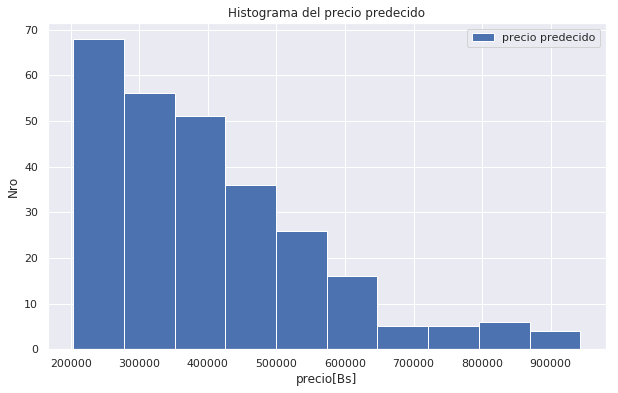

In [139]:
# import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(predicted)
plt.legend(['precio predecido'])
plt.xlabel('precio[Bs]')
plt.ylabel('Nro')
plt.title('Histograma del precio predecido')

Text(0.5, 1.0, 'Histograma del precio de Test')

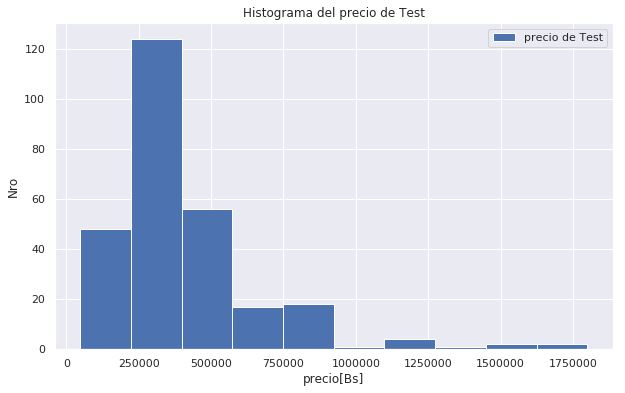

In [140]:
plt .hist(YC_test)
# plt .hist(YC_train)

plt.legend(['precio de Test'])

plt.xlabel('precio[Bs]')
plt.ylabel('Nro')
plt.title('Histograma del precio de Test')

Text(0.5, 1.0, 'Random Forest regressor ')

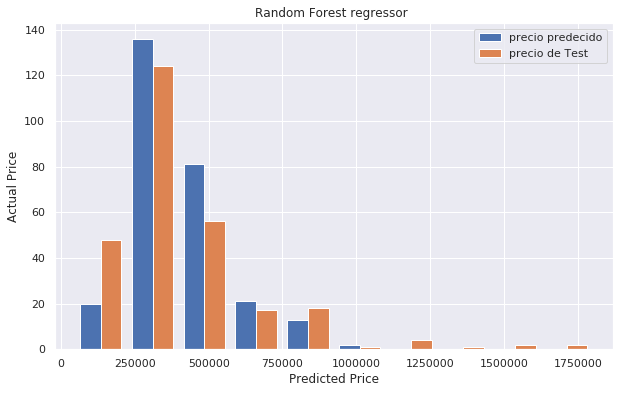

In [141]:

plt.hist([predicted, YC_test])
plt.legend(['precio predecido', 'precio de Test'])

# plt.figure(figsize = (3,3))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest regressor ')

In [142]:
# Analyzing the neighborhood_encoded feature with respect to SalePrice
# sb.regplot(x='predicted', y='YC_test', data=XC)

Text(0.5, 1.0, 'Grafica de dispersion Modelo de Regresion de Random - DEPARTAMENTOS')

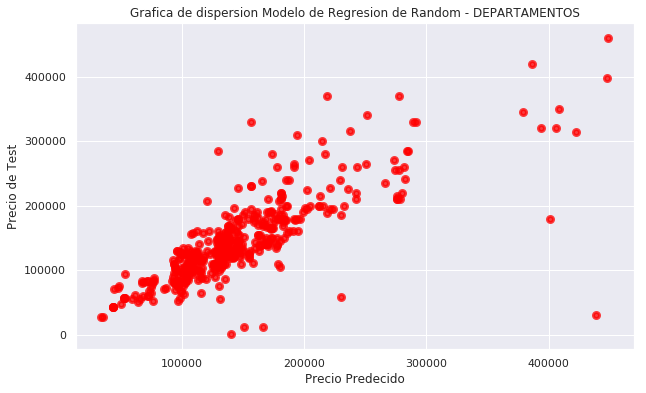

In [143]:
# Plotting the Predicted values and actual values to see how close they are
plt.scatter(predictedd, YD_test, alpha=.75, color='red', linewidth=3) # alpha helps to show overlapping data
plt.xlabel('Precio Predecido')
plt.ylabel('Precio de Test')
plt.title('Grafica de dispersion Modelo de Regresion de Random - DEPARTAMENTOS')

# YC_train



Text(0.5, 1.0, 'Grafica de dispersion Modelo de Regresion de Random - CASAS')

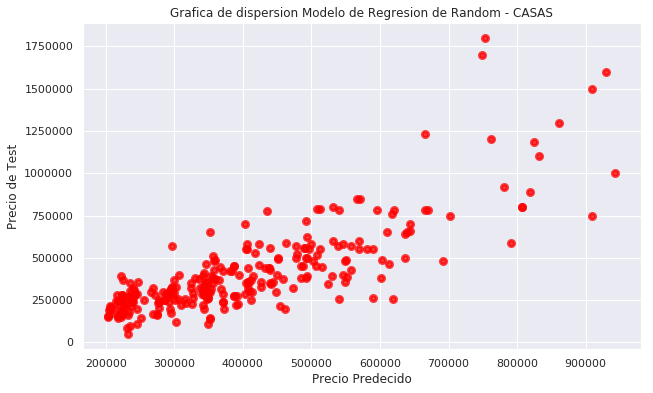

In [144]:
# Plotting the Predicted values and actual values to see how close they are
plt.scatter(predicted, YC_test, alpha=.75, color='red', linewidth=3) # alpha helps to show overlapping data
plt.xlabel('Precio Predecido')
plt.ylabel('Precio de Test')
plt.title('Grafica de dispersion Modelo de Regresion de Random - CASAS')

# YC_train


In [149]:
import graphviz

In [150]:
from sklearn.tree import export_graphviz

treedotc = export_graphviz(regr_1,
                         out_file=None,
                         feature_names=XC_test.columns)

In [151]:
treedotc

'digraph Tree {\nnode [shape=box] ;\n0 [label="dimension_built <= 489.5\\nmse = 52525339020.211\\nsamples = 273\\nvalue = 410763.733"] ;\n1 [label="dimension_ground <= 400.5\\nmse = 21111625913.11\\nsamples = 204\\nvalue = 329627.451"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 8619229203.329\\nsamples = 145\\nvalue = 275510.345"] ;\n1 -> 2 ;\n3 [label="mse = 26926810112.037\\nsamples = 59\\nvalue = 462627.119"] ;\n1 -> 3 ;\n4 [label="dimension_ground <= 736.5\\nmse = 68394616985.732\\nsamples = 69\\nvalue = 650644.913"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 30113040679.013\\nsamples = 52\\nvalue = 582269.212"] ;\n4 -> 5 ;\n6 [label="mse = 127447089965.398\\nsamples = 17\\nvalue = 859794.118"] ;\n4 -> 6 ;\n}'

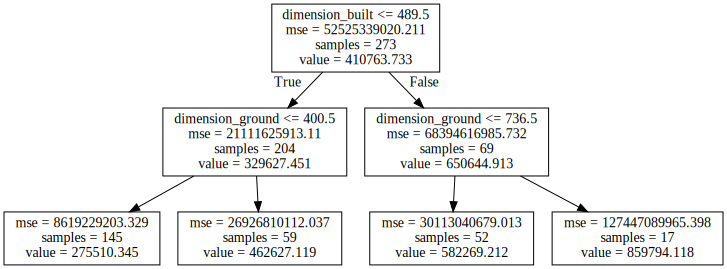

In [152]:
graphviz.Source(treedotc)

In [153]:
from sklearn.tree import export_graphviz

treedotd = export_graphviz(regr_2,
                         out_file=None,
                         feature_names=XC_test.columns)

In [154]:
treedotd

'digraph Tree {\nnode [shape=box] ;\n0 [label="dimension_built <= 489.5\\nmse = 52525339020.211\\nsamples = 273\\nvalue = 410763.733"] ;\n1 [label="dimension_ground <= 400.5\\nmse = 21111625913.11\\nsamples = 204\\nvalue = 329627.451"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="dimension_built <= 332.5\\nmse = 8619229203.329\\nsamples = 145\\nvalue = 275510.345"] ;\n1 -> 2 ;\n3 [label="dimension_built <= 270.5\\nmse = 5727151534.763\\nsamples = 104\\nvalue = 244701.923"] ;\n2 -> 3 ;\n4 [label="year_built <= 1982.0\\nmse = 3901766666.667\\nsamples = 60\\nvalue = 218000.0"] ;\n3 -> 4 ;\n5 [label="bathroom <= 2.5\\nmse = 1806250000.0\\nsamples = 2\\nvalue = 372500.0"] ;\n4 -> 5 ;\n6 [label="mse = 0.0\\nsamples = 1\\nvalue = 330000.0"] ;\n5 -> 6 ;\n7 [label="mse = 0.0\\nsamples = 1\\nvalue = 415000.0"] ;\n5 -> 7 ;\n8 [label="longitud <= -68.061\\nmse = 3122530618.312\\nsamples = 58\\nvalue = 212672.414"] ;\n4 -> 8 ;\n9 [label="latitud <= -16.501\\nmse = 376

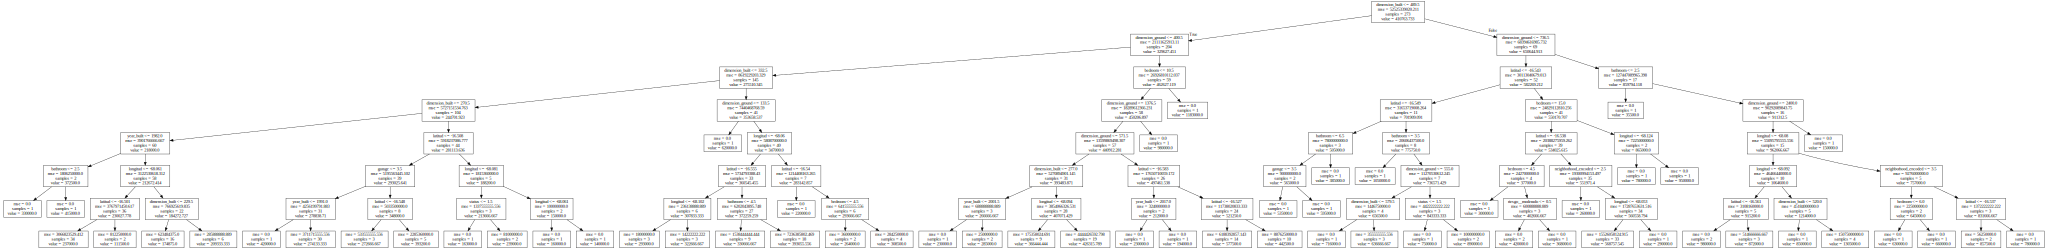

In [155]:
graphviz.Source(treedotd)